In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from keras.models import Sequential

**Loading the Data**

In [26]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

In [27]:
print(x_train.shape,x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


**Rshaping the Label array**

In [28]:
y_test = y_test.reshape(-1,)
y_test.shape

y_train = y_train.reshape(-1,)
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [29]:
#names corresponding to numbers
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [30]:
print(y_train[10],classes[y_train[10]])

4 deer


None


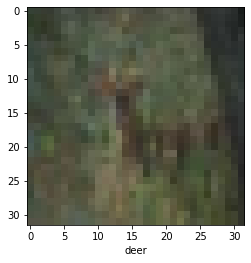

In [31]:
#to see any image
def print_image(index):
    plt.figure(figsize=(4,4))
    plt.imshow(x_train[index])
    plt.xlabel(classes[y_train[index]]);

print(print_image(10))

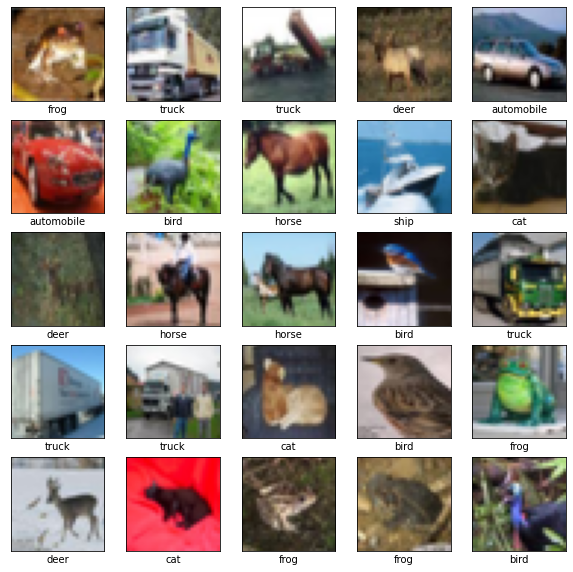

In [32]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(classes[y_train[i]])

In [33]:
#Normalizing the images
x_train = x_train/255
x_test = x_test/255

In [34]:
x_train.shape

(50000, 32, 32, 3)

In [35]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

**CNN**

In [36]:
model = Sequential([
    
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense network
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [37]:
#early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=3)

In [38]:
#compile the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                147520    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [40]:
#training
hist = model.fit(x_train,y_train,epochs=10,validation_split=0.1,callbacks=[callback])

Epoch 1/10
1407/1407 [==============================] - 58s 41ms/step - loss: 1.7051 - accuracy: 0.3816 - val_loss: 1.2444 - val_accuracy: 0.5612
Epoch 2/10
1407/1407 [==============================] - 55s 39ms/step - loss: 1.1509 - accuracy: 0.5960 - val_loss: 1.0273 - val_accuracy: 0.6464
Epoch 3/10
1407/1407 [==============================] - 55s 39ms/step - loss: 0.9985 - accuracy: 0.6520 - val_loss: 0.9330 - val_accuracy: 0.6754
Epoch 4/10
1407/1407 [==============================] - 55s 39ms/step - loss: 0.8783 - accuracy: 0.6948 - val_loss: 0.9705 - val_accuracy: 0.6766
Epoch 5/10
1407/1407 [==============================] - 55s 39ms/step - loss: 0.8109 - accuracy: 0.7186 - val_loss: 0.9214 - val_accuracy: 0.6830
Epoch 6/10
1407/1407 [==============================] - 55s 39ms/step - loss: 0.7556 - accuracy: 0.7366 - val_loss: 0.8642 - val_accuracy: 0.7032
Epoch 7/10
1407/1407 [==============================] - 55s 39ms/step - loss: 0.6939 - accuracy: 0.7596 - val_loss: 0.8678 -

In [41]:
#test
model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9514 - accuracy: 0.6923


[0.9514013528823853, 0.692300021648407]

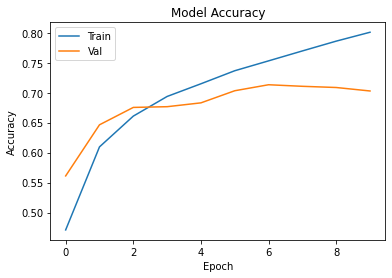

In [42]:
#visualize the models accuray
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train','Val'],loc='upper left')
plt.show()

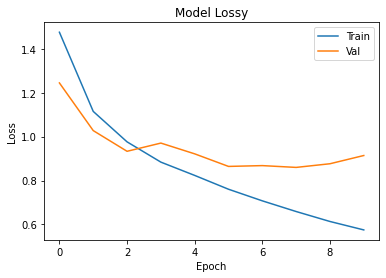

In [43]:
#visualize models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Model Lossy")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train','Val'],loc='upper right')
plt.show()

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(x_test)
y_pred = [np.argmax(i) for i in predictions]

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72      1000
           1       0.78      0.87      0.82      1000
           2       0.58      0.57      0.58      1000
           3       0.52      0.46      0.49      1000
           4       0.62      0.67      0.64      1000
           5       0.64      0.56      0.60      1000
           6       0.64      0.85      0.73      1000
           7       0.84      0.67      0.75      1000
           8       0.73      0.86      0.79      1000
           9       0.83      0.73      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [45]:
print(confusion_matrix(y_test,y_pred))

[[682  37  50  15  24   9  27   8 119  29]
 [ 13 868   7   4   3   2  12   0  44  47]
 [ 63  12 569  62  87  63  99  19  18   8]
 [ 18  12  83 462  97 128 134  27  24  15]
 [ 19   7  70  59 665  22 101  33  19   5]
 [ 13   8  80 173  74 562  53  18  13   6]
 [  4   7  44  43  21  13 852   3  11   2]
 [ 22  12  50  51  89  61  25 667   6  17]
 [ 39  36  12   6   6   6   9   5 861  20]
 [ 29 115  13   8   6  10  16  10  58 735]]


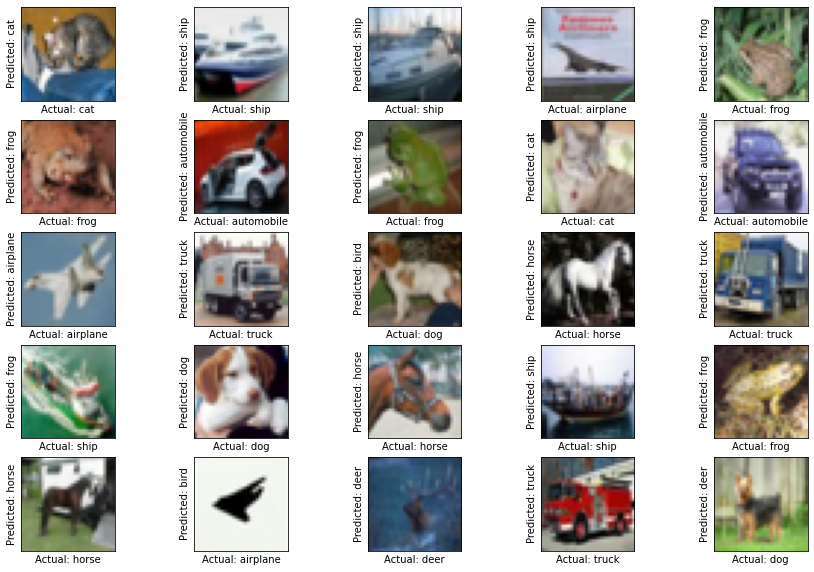

In [46]:
plt.figure(figsize=(15,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i])
    plt.xlabel("Actual: {}".format(classes[y_test[i]]))
    plt.ylabel("Predicted: {}".format(classes[y_pred[i]]))